<div class="alert alert-block alert-info">
<span style="font-size: 26px;"><b>Blob Analytical Scaling Law</b></span><br>
<span style="font-size: 16px;">
- 3D blob analysis <br>
- $\Lambda$ and $\Theta$ scaling law comparison between NT and PT plasmas. <br>
- Scan in plasma resistivity as well $\nu=0.1, 0.3, 1.0$ both in PT and NT. <br>
</span>
</div>



In [1]:
import sys
#sys.path.append('/marconi/home/userexternal/klim0000/my_venv/lib/python3.9/site-packages')
#from skimage.measure import label, regionprops

In [6]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
import matplotlib.colors as mcolors

from skimage import measure
from scipy.spatial.distance import cdist

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

In [8]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height =  fig_width / 1.618
plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    #'font.family': 'Sans-serif',           # Font family
    #'font.sans-serif': ['Arial', 'Helvetica'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 10,                  # Font size of the x tick labels
    'ytick.labelsize': 10,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 12,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 4,                 # Marker size
    'lines.markeredgewidth' : 0.8,
    'lines.markeredgecolor' : 'black',
    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style
    
    # Scatter settings
    #'scatter.edgecolors': None,
    
    # Marker
    'lines.markeredgewidth' : 5,
    'lines.markeredgecolor' : 'black'

})

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load NT </b></span><br>
</div>

In [9]:
# Get the current working directory|
cwd = os.getcwd()

#os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p6')

os.chdir('/scratch/project_465000814/kyungtak/GBS_DN_test/DNT_dn0p6') # LUMI-C

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

t2= s.time[-1]
t1= t2

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

Psi_DNT = s.Psi; ixxpt_DNT = s.ixxpt; iyxpt_DNT = s.iyxpt

dens_DNT  = s.get_field('n', z1=z1, z2=z2, t1=t1, t2=t2)
dens_DNT_avg  = np.mean(dens_DNT, axis=(2,3)); 
dens_DNT_std  = np.std(dens_DNT, axis=(2,3))
dens_DNT_avg_tor = np.mean(dens_DNT, axis=2)

# Normalized
dens_DNT_fluct   = np.sqrt((dens_DNT[:,:,0,:]-dens_DNT_avg_tor)**2) / dens_DNT_avg_tor
#dens_fluct = dens[:,:,0,-1] - dens_avg
dens_DNT_fluct_avg = np.mean(dens_DNT_fluct, axis=2)


Current working directory: /pfs/lustrep1/users/limkyung/JN_marconi/jupyter_notebook/3_GBS_DN_Tria


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load PT </b></span><br>
</div>

In [10]:
# Get the current working directory|
cwd = os.getcwd()

#os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6')

os.chdir('/scratch/project_465000814/kyungtak/GBS_DN_test/DPT_d0p6') # LUMI-C


# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

t2= s.time[-1]
t1= t2

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

Psi_DPT = s.Psi; ixxpt_DPT = s.ixxpt; iyxpt_DPT = s.iyxpt

dens_DPT  = s.get_field('n', z1=z1, z2=z2, t1=t1, t2=t2)
dens_DPT_avg  = np.mean(dens_DPT, axis=(2,3)); 
dens_DPT_std  = np.std(dens_DPT, axis=(2,3))
dens_DPT_avg_tor = np.mean(dens_DPT, axis=2)

# Normalized
dens_DPT_fluct   = np.sqrt((dens_DPT[:,:,0,:]-dens_DPT_avg_tor)**2) / dens_DPT_avg_tor
#dens_fluct = dens[:,:,0,-1] - dens_avg
dens_DPT_fluct_avg = np.mean(dens_DPT_fluct, axis=2)

Current working directory: /pfs/lustrep3/scratch/project_465000814/kyungtak/GBS_DN_test/DNT_dn0p6


<div class="alert alert-block alert-info">
<span style="font-size: 20px;"><b>DNT mask </b></span><br>
</div>

/tmp/ipykernel_228189/3694588769.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  mask_bottom = mask_contour.collections[0].get_paths()[0]
/tmp/ipykernel_228189/3694588769.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  mask_top    = mask_contour.collections[0].get_paths()[1]


IndexError: list index out of range

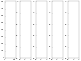

In [13]:
## NT 
X, Y = np.meshgrid(s.x, s.y)

fig, axes = plt.subplots(ncols=5,  figsize=(8, 6),  dpi=10, constrained_layout=True) 

mask_contour=axes[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]],colors='w')

mask_bottom = mask_contour.collections[0].get_paths()[0]
mask_top    = mask_contour.collections[0].get_paths()[1]
mask_center = mask_contour.collections[0].get_paths()[2]

# Create a mask for points inside the contour path
inside_mask_bottom_DNT = mask_bottom.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_top_DNT    = mask_top.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_center_DNT = mask_center.contains_points(np.column_stack([X.ravel(), Y.ravel()]))

inside_mask_top_DNT    = inside_mask_top_DNT.reshape(X.shape)
inside_mask_center_DNT = inside_mask_center_DNT.reshape(X.shape)
inside_mask_bottom_DNT = inside_mask_bottom_DNT.reshape(X.shape)

# For left and right part
outside_mask_DNT = ~inside_mask_center_DNT & ~inside_mask_top_DNT & ~inside_mask_bottom_DNT

# Get the X coordinates that are to the left of the center region
left_outside_mask_DNT = outside_mask_DNT & (X < s.x[ixxpt_DNT])
right_outside_mask_DNT = outside_mask_DNT & (X > s.x[ixxpt_DNT])

# Reshape this mask to the original shape if necessary
left_outside_mask_DNT = left_outside_mask_DNT.reshape(X.shape)
right_outside_mask_DNT = right_outside_mask_DNT.reshape(X.shape)

In [38]:
mask_contour=axes[0].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]],colors='w')

mask_bottom = mask_contour.collections[0].get_paths()[0]
mask_top    = mask_contour.collections[0].get_paths()[1]
mask_center = mask_contour.collections[0].get_paths()[2]

# Create a mask for points inside the contour path
inside_mask_bottom_DPT = mask_bottom.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_top_DPT    = mask_top.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_center_DPT = mask_center.contains_points(np.column_stack([X.ravel(), Y.ravel()]))

inside_mask_top_DPT    = inside_mask_top_DPT.reshape(X.shape)
inside_mask_center_DPT = inside_mask_center_DPT.reshape(X.shape)
inside_mask_bottom_DPT = inside_mask_bottom_DPT.reshape(X.shape)

# For left and right part
outside_mask_DPT = ~inside_mask_center_DPT & ~inside_mask_top_DPT & ~inside_mask_bottom_DPT

# Get the X coordinates that are to the left of the center region
left_outside_mask_DPT = outside_mask_DPT & (X < s.x[ixxpt_DPT])
right_outside_mask_DPT = outside_mask_DPT & (X > s.x[ixxpt_DPT])

# Reshape this mask to the original shape if necessary
left_outside_mask_DPT = left_outside_mask_DPT.reshape(X.shape)
right_outside_mask_DPT = right_outside_mask_DPT.reshape(X.shape)

In [39]:
mask_contour=axes[0].contour(X, Y, Psi_DN, levels=[Psi_DN[iyxpt_DN, ixxpt_DN]],colors='w')

mask_bottom = mask_contour.collections[0].get_paths()[0]
mask_top    = mask_contour.collections[0].get_paths()[1]
mask_center = mask_contour.collections[0].get_paths()[2]

# Create a mask for points inside the contour path
inside_mask_bottom_DN = mask_bottom.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_top_DN    = mask_top.contains_points(np.column_stack([X.ravel(), Y.ravel()]))
inside_mask_center_DN = mask_center.contains_points(np.column_stack([X.ravel(), Y.ravel()]))

inside_mask_top_DN    = inside_mask_top_DN.reshape(X.shape)
inside_mask_center_DN = inside_mask_center_DN.reshape(X.shape)
inside_mask_bottom_DN = inside_mask_bottom_DN.reshape(X.shape)

# For left and right part
outside_mask_DN = ~inside_mask_center_DN & ~inside_mask_top_DN & ~inside_mask_bottom_DN

# Get the X coordinates that are to the left of the center region
left_outside_mask_DN = outside_mask_DN & (X < s.x[ixxpt_DN])
right_outside_mask_DN = outside_mask_DN & (X > s.x[ixxpt_DN])

# Reshape this mask to the original shape if necessary
left_outside_mask_DN = left_outside_mask_DN.reshape(X.shape)
right_outside_mask_DN = right_outside_mask_DN.reshape(X.shape)

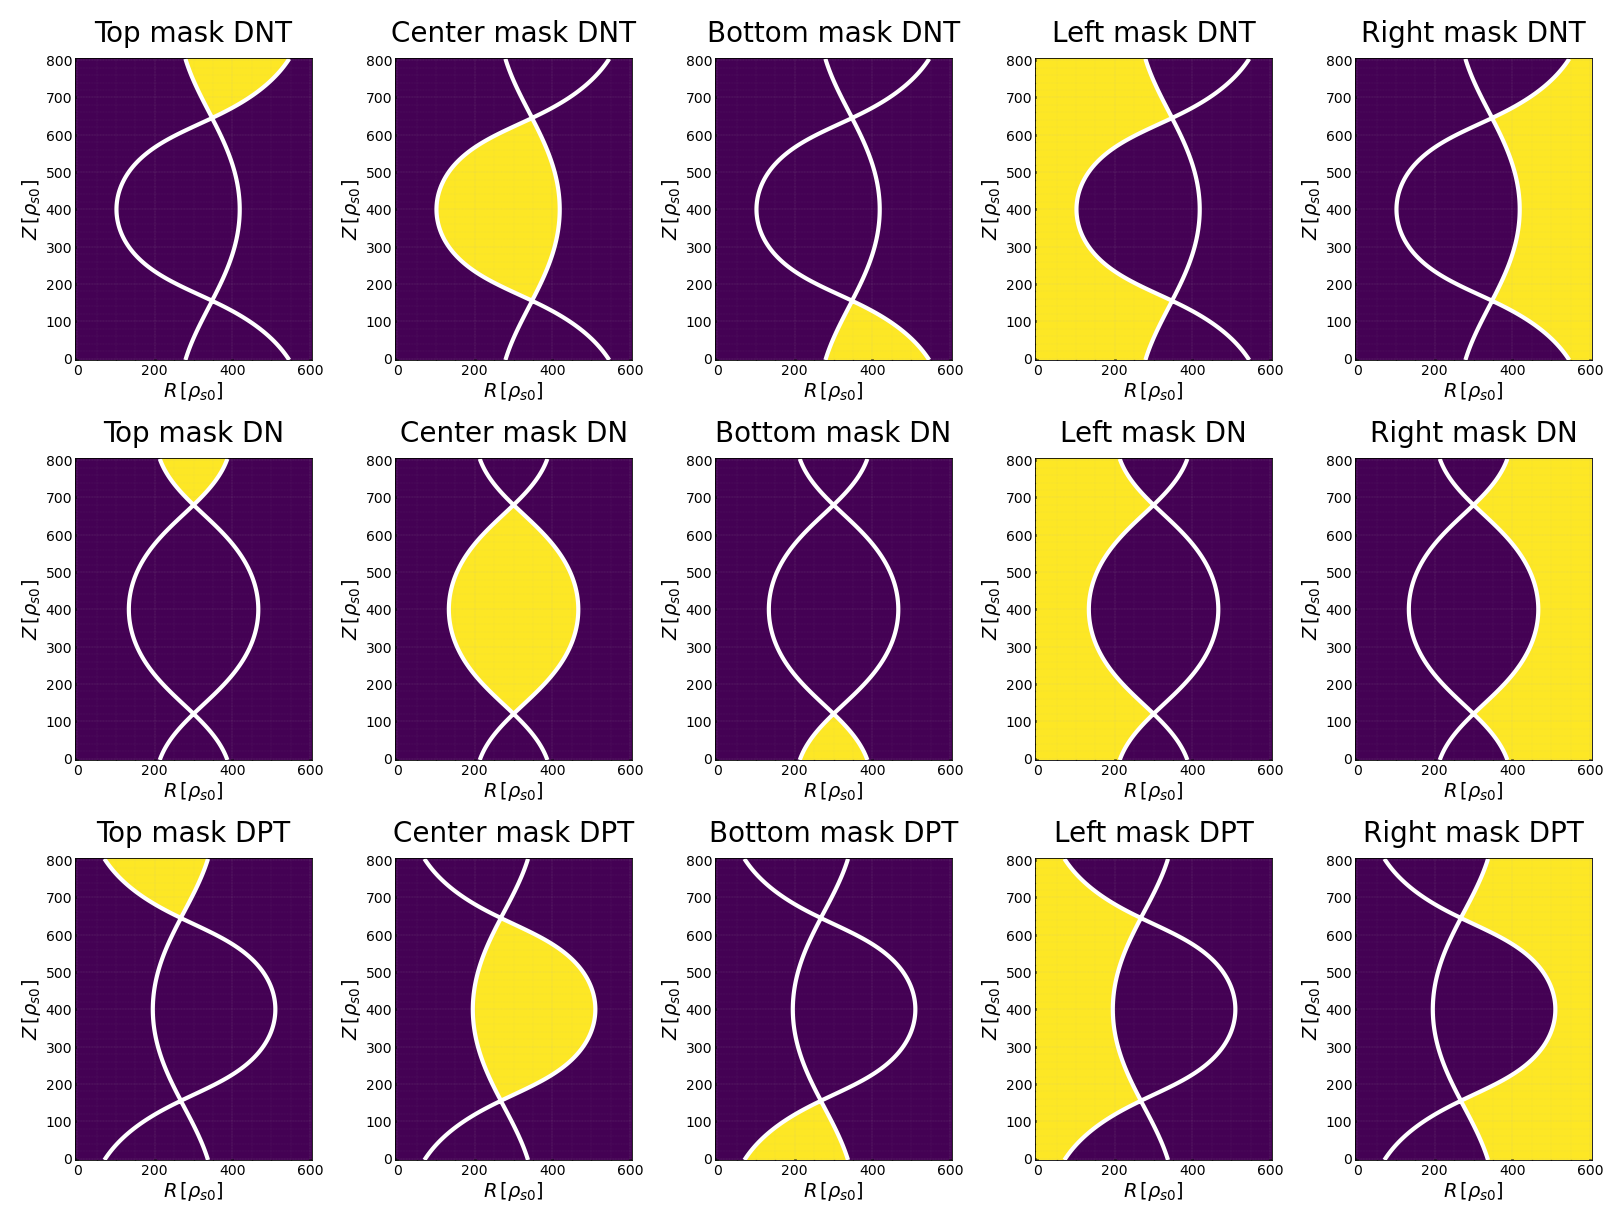

In [40]:
X, Y = np.meshgrid(s.x, s.y)
fig, axes = plt.subplots(nrows=3, ncols=5,  figsize=(8, 6),  dpi=200, constrained_layout=True) 


# Plot the figure
cs1 = axes[0,0].pcolormesh(X, Y, inside_mask_top_DNT, cmap='viridis')
cs2 = axes[0,1].pcolormesh(X, Y, inside_mask_center_DNT, cmap='viridis')
cs3 = axes[0,2].pcolormesh(X, Y, inside_mask_bottom_DNT, cmap='viridis')
cs4 = axes[0,3].pcolormesh(X, Y, left_outside_mask_DNT, cmap='viridis')
cs5 = axes[0,4].pcolormesh(X, Y, right_outside_mask_DNT, cmap='viridis')

cs1 = axes[1,0].pcolormesh(X, Y, inside_mask_top_DN, cmap='viridis')
cs2 = axes[1,1].pcolormesh(X, Y, inside_mask_center_DN, cmap='viridis')
cs3 = axes[1,2].pcolormesh(X, Y, inside_mask_bottom_DN, cmap='viridis')
cs4 = axes[1,3].pcolormesh(X, Y, left_outside_mask_DN, cmap='viridis')
cs5 = axes[1,4].pcolormesh(X, Y, right_outside_mask_DN, cmap='viridis')

cs1 = axes[2,0].pcolormesh(X, Y, inside_mask_top_DPT, cmap='viridis')
cs2 = axes[2,1].pcolormesh(X, Y, inside_mask_center_DPT, cmap='viridis')
cs3 = axes[2,2].pcolormesh(X, Y, inside_mask_bottom_DPT, cmap='viridis')
cs4 = axes[2,3].pcolormesh(X, Y, left_outside_mask_DPT, cmap='viridis')
cs5 = axes[2,4].pcolormesh(X, Y, right_outside_mask_DPT, cmap='viridis')


# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# The following indexing assumes that the order of plotting matches the flattening order of the axes
# Plot the pcolormesh for each subplot
pcolormeshes = [
    inside_mask_top_DNT, inside_mask_center_DNT, inside_mask_bottom_DNT, left_outside_mask_DNT, right_outside_mask_DNT,
    inside_mask_top_DN, inside_mask_center_DN, inside_mask_bottom_DN, left_outside_mask_DN, right_outside_mask_DN,
    inside_mask_top_DPT, inside_mask_center_DPT, inside_mask_bottom_DPT, left_outside_mask_DPT, right_outside_mask_DPT
]

titles = [
    'Top mask DNT', 'Center mask DNT', 'Bottom mask DNT', 'Left mask DNT', 'Right mask DNT',
    'Top mask DN', 'Center mask DN', 'Bottom mask DN', 'Left mask DN', 'Right mask DN',
    'Top mask DPT', 'Center mask DPT', 'Bottom mask DPT', 'Left mask DPT', 'Right mask DPT'
]

for i in range(5):
    axes[0,i].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w')
    axes[2,i].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w')
    axes[1,i].contour(X, Y, Psi_DN, levels=[Psi_DN[iyxpt_DN, ixxpt_DN]], colors='w')


for ax, data, title in zip(axes_flat, pcolormeshes, titles):
    cs = ax.pcolormesh(X, Y, data, cmap='viridis')
    ax.set_title(title, fontsize=10)
    ax.grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
    ax.grid(True, which='minor', alpha=0.4, linestyle=':', linewidth=0.1)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='x', labelsize=5, pad=1)
    ax.tick_params(axis='y', labelsize=5, pad=1)
    ax.tick_params(which='minor', direction="in", size=0.2)
    ax.tick_params(which='major', direction="in", size=0.5)
    ax.spines["bottom"].set_linewidth(0.3)
    ax.spines["left"].set_linewidth(0.3)
    ax.spines["right"].set_linewidth(0.3)
    ax.spines["top"].set_linewidth(0.3)
    ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=7, labelpad=1)
    ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=7, rotation=90, labelpad=1)

# Show the plot
plt.show()

<div class="alert alert-block alert-info">
<span style="font-size: 26px;"><b>Consider only blobs within the masked region </b></span><br>
</div>

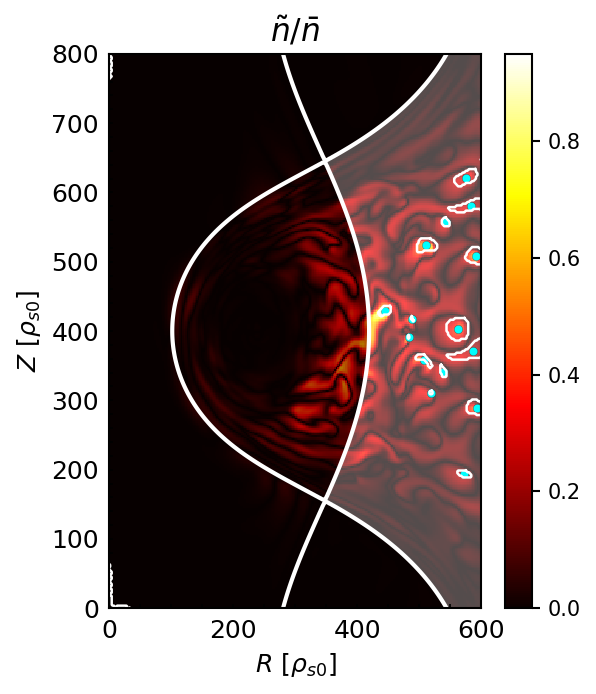

In [41]:
import skimage
from skimage.measure import label, regionprops, find_contours

X,Y = np.meshgrid(s.x, s.y)
    
# Visualize each contour on the original plot
fig, ax = plt.subplots(figsize=(4, 4.8), dpi=150)

cst=2.5


#Choose a threshold level (30% fluctuation)
threshold = 0.25 * np.max(dens_DNT_fluct_avg)
#binary_image = dens_DNT_fluct_avg > threshold

binary_image = dens_DNT_fluct_avg > dens_DNT_avg + 2.5*dens_DNT_std

# Label the regions in the binary image
labeled_image = label(binary_image)

# Find contours using the skimage measure module
contours = measure.find_contours(binary_image.astype(float), 0.5)  # Use 0.5 since binary image is either 0 or 1

# Initialization of conditions
Nb_blobs_DNT = 0
areas_DNT = []
perimeters_DNT = []
size_DNT=[]

# Calculate properties of each region
for region in regionprops(labeled_image):
    
    # The centroid coordinates of the region
    centroid = region.centroid

    # The perimeter of the region in pixels
    perimeter = region.perimeter
    

    # The centroid coordinates (note the inversion of x and y for plotting)
    Y0, X0 = region.centroid
        
    # Convert centroid coordinates to indices
    X0_idx, Y0_idx = int(X0), int(Y0)

    # Check if the centroid is within the right side region
    if right_outside_mask_DNT[Y0_idx, X0_idx]:
        Nb_blobs_DNT += 1
        # This centroid is inside the right side region, so plot it
        ax.plot(cst*X0, cst*Y0, 'o', c='cyan', markersize=4, mew=0.1, mec='k')  # plot the centroid in blue
        
        # Calculate and store the area and perimeter if needed
        areas_DNT.append(region.area)
        perimeters_DNT.append(region.perimeter)
        
        size_DNT.append(region.major_axis_length * region.minor_axis_length)

    # The length of the minor and major axis
    minor_axis_length = region.minor_axis_length
    major_axis_length = region.major_axis_length

    # The orientation of the ellipse
    orientation = region.orientation

    # Get the end points of the major axis
    X_major_axis_end1 = X0 + np.cos(orientation) * 0.5 * major_axis_length
    Y_major_axis_end1 = Y0 - np.sin(orientation) * 0.5 * major_axis_length
    X_major_axis_end2 = X0 - np.cos(orientation) * 0.5 * major_axis_length
    Y_major_axis_end2 = Y0 + np.sin(orientation) * 0.5 * major_axis_length

    # Get the end points of the minor axis
    X_minor_axis_end1 = X0 + np.sin(orientation) * 0.5 * minor_axis_length
    Y_minor_axis_end1 = Y0 + np.cos(orientation) * 0.5 * minor_axis_length
    X_minor_axis_end2 = X0 - np.sin(orientation) * 0.5 * minor_axis_length
    Y_minor_axis_end2 = Y0 - np.cos(orientation) * 0.5 * minor_axis_length

    # Plot the major axis
    #ax.plot([cst*X_major_axis_end1, cst*X_major_axis_end2],
    #        [cst*Y_major_axis_end1, cst*Y_major_axis_end2], 'b-')

    # Plot the minor axis
    #ax.plot([cst*X_minor_axis_end1, cst*X_minor_axis_end2],
    #        [cst*Y_minor_axis_end1, cst*Y_minor_axis_end2], 'b-')

    

# Velocity of the blobs


    
cs = ax.pcolormesh(X, Y, dens_DNT_fluct_avg, cmap='hot', vmin=0, vmax=np.max(dens_DNT_fluct_avg))
cbar = fig.colorbar(cs)
cs5 = ax.pcolormesh(X, Y, right_outside_mask_DNT, cmap='binary_r', alpha=0.3)


# Plot the separatrix
ax.contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linewidths=2)
# Plot each contour
for contour in contours:
    # Since dens_fluct_avg is (Y, X), contour[:, 0] is Y, and contour[:, 1] is X
    ax.plot(cst*contour[:, 1], cst*contour[:, 0], linewidth=1.2, c='w')  # No need to adjust contour plotting orientation

# Set the axes labels
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', direction='in', labelsize=12, width=0.8, size=2, pad=5)
ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=12)
ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=12, rotation=90)
ax.set_title(r'$\tilde{n}/\bar{n}$', fontsize=15)
ax.set_xlim([0,600]); ax.set_ylim([0,800])

plt.show()

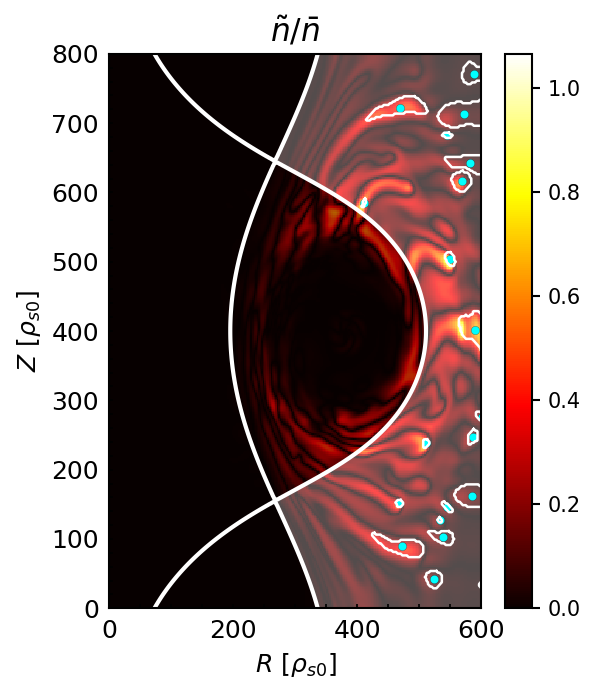

In [14]:
import skimage
from skimage.measure import label, regionprops, find_contours

X,Y = np.meshgrid(s.x, s.y)
    
# Visualize each contour on the original plot
fig, ax = plt.subplots(figsize=(4, 4.8), dpi=150)

cst=2.5


#Choose a threshold level (30% fluctuation)
#threshold = 0.2 * np.max(dens_DPT_fluct_avg)
#binary_image = dens_DPT_fluct_avg > threshold
binary_image = dens_DPT_fluct_avg > dens_DPT_avg + 2.5*dens_DPT_std
# Label the regions in the binary image
labeled_image = label(binary_image)

# Find contours using the skimage measure module
contours = measure.find_contours(binary_image.astype(float), 0.5)  # Use 0.5 since binary image is either 0 or 1


Nb_blobs_DPT = 0

areas_DPT = []
perimeters_DPT = []
size_DPT=[]
# Calculate properties of each region
for region in regionprops(labeled_image):
    
    # The centroid coordinates of the region
    centroid = region.centroid

    # The perimeter of the region in pixels
    perimeter = region.perimeter
    

    # The centroid coordinates (note the inversion of x and y for plotting)
    Y0, X0 = region.centroid
        
    # Convert centroid coordinates to indices
    X0_idx, Y0_idx = int(X0), int(Y0)

    # Check if the centroid is within the right side region
    if right_outside_mask_DPT[Y0_idx, X0_idx]:
        Nb_blobs_DPT += 1
        # This centroid is inside the right side region, so plot it
        ax.plot(cst*X0, cst*Y0, 'o', c='cyan', markersize=4, mew=0.1, mec='k')  # plot the centroid in blue
        
        # Calculate and store the area and perimeter if needed
        areas_DPT.append(region.area)
        perimeters_DPT.append(region.perimeter)
        
        size_DPT.append(region.major_axis_length * region.minor_axis_length)

    # The length of the minor and major axis
    minor_axis_length = region.minor_axis_length
    major_axis_length = region.major_axis_length

    # The orientation of the ellipse
    orientation = region.orientation

    # Get the end points of the major axis
    X_major_axis_end1 = X0 + np.cos(orientation) * 0.5 * major_axis_length
    Y_major_axis_end1 = Y0 - np.sin(orientation) * 0.5 * major_axis_length
    X_major_axis_end2 = X0 - np.cos(orientation) * 0.5 * major_axis_length
    Y_major_axis_end2 = Y0 + np.sin(orientation) * 0.5 * major_axis_length

    # Get the end points of the minor axis
    X_minor_axis_end1 = X0 + np.sin(orientation) * 0.5 * minor_axis_length
    Y_minor_axis_end1 = Y0 + np.cos(orientation) * 0.5 * minor_axis_length
    X_minor_axis_end2 = X0 - np.sin(orientation) * 0.5 * minor_axis_length
    Y_minor_axis_end2 = Y0 - np.cos(orientation) * 0.5 * minor_axis_length

    # Plot the major axis
    #ax.plot([cst*X_major_axis_end1, cst*X_major_axis_end2],
    #        [cst*Y_major_axis_end1, cst*Y_major_axis_end2], 'b-')

    # Plot the minor axis
    #ax.plot([cst*X_minor_axis_end1, cst*X_minor_axis_end2],
    #        [cst*Y_minor_axis_end1, cst*Y_minor_axis_end2], 'b-')

    

# Velocity of the blobs

    
cs = ax.pcolormesh(X, Y, dens_DPT_fluct_avg, cmap='hot', vmin=0, vmax=np.max(dens_DPT_fluct_avg))
cbar = fig.colorbar(cs)
cs5 = ax.pcolormesh(X, Y, right_outside_mask_DPT, cmap='binary_r', alpha=0.3)


# Plot the separatrix
ax.contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linewidths=2)
# Plot each contour
for contour in contours:
    # Since dens_fluct_avg is (Y, X), contour[:, 0] is Y, and contour[:, 1] is X
    ax.plot(cst*contour[:, 1], cst*contour[:, 0], linewidth=1.2, c='w')  # No need to adjust contour plotting orientation

# Set the axes labels
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', direction='in', labelsize=12, width=0.8, size=2, pad=5)
ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=12)
ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=12, rotation=90)
ax.set_title(r'$\tilde{n}/\bar{n}$', fontsize=15)
ax.set_xlim([0,600]); ax.set_ylim([0,800])

plt.show()

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Blob velocity scaling</b></span><br>
</div>

In [42]:
print("The total number of blobs in the NT masked region=", Nb_blobs_DNT)
print("The total number of blobs in the PT masked region=", Nb_blobs_DPT)
#print("The total number of blobs in the masked region=", Nb_blobs_DN)


print("The total number of blobs in the NT masked region=", areas_DNT)
print("The total number of blobs in the PT masked region=", areas_DPT)


The total number of blobs in the NT masked region= 17
The total number of blobs in the PT masked region= 20
The total number of blobs in the NT masked region= [28.0, 94.0, 4.0, 20.0, 32.0, 171.0, 152.0, 2.0, 3.0, 35.0, 102.0, 83.0, 8.0, 20.0, 118.0, 94.0, 11.0]
The total number of blobs in the PT masked region= [26.0, 81.0, 227.0, 88.0, 6.0, 21.0, 15.0, 231.0, 16.0, 40.0, 29.0, 289.0, 38.0, 8.0, 112.0, 208.0, 15.0, 401.0, 264.0, 150.0]


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> DNT velocity scaling</b></span><br>
<span style="font-size: 16px;">
- This should be done for a longer time <br>
</span>
</div>

In [166]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p6')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

t2= s.time[-1]
t1= t2 - 10

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

dens_DNT_fluct_avg = []
dens_DNT_equil_avg = []
dens_DNT  = s.get_field('n', z1=z1, z2=z2, t1=t1, t2=t2)
dens_DNT_avg = np.mean(dens_DNT, axis=(2,3))
dens_DNT_std = np.std(dens_DNT, axis=(2,3))
for i in range(dens_DNT.shape[-1]):
    density_DNT = dens_DNT[:,:,:,i]
    dens_DNT_avg_t = np.mean(density_DNT, axis=2)
    dens_DNT_fluct = np.sqrt((density_DNT[:,:,0] - dens_DNT_avg_t)**2) / dens_DNT_avg_t
    dens_DNT_fluct_avg.append(dens_DNT_fluct)
    dens_DNT_equil_avg.append(dens_DNT_avg_t)

# Convert list of arrays to a single 3D NumPy array
dens_DNT_fluct_avg_array = np.stack(dens_DNT_fluct_avg, axis=-1)
dens_DNT_equil_avg_array = np.stack(dens_DNT_equil_avg, axis=-1)

Current working directory: /marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6


In [167]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

t2= s.time[-1]
t1= t2 - 10

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

dens_DPT_fluct_avg = []
dens_DPT_equil_avg = []
dens_DPT  = s.get_field('n', z1=z1, z2=z2, t1=t1, t2=t2)
dens_DPT_avg = np.mean(dens_DNT, axis=(2,3))
dens_DPT_std = np.std(dens_DNT, axis=(2,3))

for i in range(dens_DPT.shape[-1]):
    density_DPT = dens_DPT[:,:,:,i]
    dens_DPT_avg_t = np.mean(density_DPT, axis=2)
    dens_DPT_fluct = np.sqrt((density_DPT[:,:,0] - dens_DPT_avg_t)**2) / dens_DPT_avg_t
    dens_DPT_fluct_avg.append(dens_DPT_fluct)
    dens_DPT_equil_avg.append(dens_DPT_avg_t)
    

# Convert list of arrays to a single 3D NumPy array
dens_DPT_fluct_avg_array = np.stack(dens_DPT_fluct_avg, axis=-1)
dens_DPT_equil_avg_array = np.stack(dens_DPT_equil_avg, axis=-1)

Current working directory: /marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Velocity scaling</b></span><br>
</div>

In [168]:
centroids_over_time_DNT = []
areas_over_time_DNT = [] 
amp_over_time_DNT = []
tstep = 5
time_interval = 10 # Replace with your actual time step

# Best combination? (1,1) (1,5) (1,10) not bad

for t in range(0, dens_DNT_fluct_avg_array.shape[-1], tstep):
    dens_DNT_fluct_avg = dens_DNT_fluct_avg_array[:, :, t]
    dens_DNT_equil_avg = dens_DNT_equil_avg_array[:, :, t]

    # Mask to keep only LFS
    masked_dens_DNT_fluct = np.where(right_outside_mask_DNT, dens_DNT_fluct_avg, np.nan)

    #threshold = 0.5 * np.nanmax(masked_dens_DNT_fluct)
    #binary_image = masked_dens_DNT_fluct > threshold
    binary_image = masked_dens_DNT_fluct > dens_DNT_avg + 2.5*dens_DNT_std
    labeled_image = measure.label(binary_image)

    centroids = []
    areas = [] 
    amplitudes = []
    for region in measure.regionprops(labeled_image):
        if right_outside_mask_DNT[int(region.centroid[0]), int(region.centroid[1])]:
            centroids.append(region.centroid)
            areas.append(region.area) # Store the area of the region
            amplitude = dens_DNT_equil_avg[int(region.centroid[0]), int(region.centroid[1])]
            amplitudes.append(amplitude)
            
    centroids_over_time_DNT.append(centroids)
    areas_over_time_DNT.append(areas)
    amp_over_time_DNT.append(amplitudes)

###################################################################################################
########################### Now calculate the velocities based on centroids #######################
###################################################################################################

velocities_DNT = []
matched_areas_DNT = []
matched_amplitude_DNT = []
for t in range(len(centroids_over_time_DNT) - 1):
    current_centroids = centroids_over_time_DNT[t]
    next_centroids = centroids_over_time_DNT[t + 1]

    current_areas = areas_over_time_DNT[t]
    current_amplitude = amp_over_time_DNT[t]
    
    distances = cdist(current_centroids, next_centroids)
    
    # Find the closest centroids between frames (assuming minimal movement)
    for i, centroid in enumerate(current_centroids):
        closest_index = np.argmin(distances[i])
        closest_centroid = next_centroids[closest_index]

        # Calculate the displacement
        displacement = np.linalg.norm(np.array(centroid) - np.array(closest_centroid))

        # Calculate the velocity and append to the list
        velocity = displacement / time_interval
        velocities_DNT.append(velocity)
        
        # Append the area of the current centroid to matched_areas_DNT
        matched_areas_DNT.append(current_areas[i])
        matched_amplitude_DNT.append(current_amplitude[i])

#areas_DNT = [area for sublist in matched_areas_over_time_DNT for area in sublist]

# Now calculate the x-component of velocities based on centroids
x_velocities_DNT = []

# Loop over the centroids list (except the last one)
#for t in range(len(centroids_over_time_DNT) - 1):
for t in range(len(centroids_over_time_DNT) - time_interval):
    current_centroids = centroids_over_time_DNT[t]
    #next_centroids = centroids_over_time_DNT[t + 1]
    next_centroids = centroids_over_time_DNT[t + time_interval]

    # If no centroids in either list, skip to next iteration
    if not current_centroids or not next_centroids:
        continue

    # Calculate the pairwise distance between centroids
    distances = cdist(current_centroids, next_centroids)

    # Track x-velocity for matched centroids
    for i, centroid in enumerate(current_centroids):
        if len(next_centroids) > i:  # Ensure there is a centroid to compare to
            # Find the closest centroid in the next frame
            closest_index = np.argmin(distances[i])

            # Calculate the x-component of displacement
            x_displacement = next_centroids[closest_index][1] - centroid[1]

            # Calculate the x-component of the velocity
            x_velocity = x_displacement / time_interval
            x_velocities_DNT.append(x_velocity)

# x_velocities contains the x-component of the velocity of each matched blob between consecutive frames

# Filter the list to include only positive x-velocities
positive_x_velocities_DNT = [velocity for velocity in x_velocities_DNT if velocity > 0]
areas_DNT = np.sqrt(np.array(matched_areas_DNT)/np.pi)
amp_DNT = np.array(matched_amplitude_DNT)
# Now positive_x_velocities contains only the positive x-components of the velocity
print(len(velocities_DNT), len(areas_DNT), len(matched_amplitude_DNT))


48 48 48


In [171]:
centroids_over_time_DPT = []
areas_over_time_DPT = [] 
amp_over_time_DPT = []

for t in range(0, dens_DPT_fluct_avg_array.shape[-1], tstep):
    dens_DPT_fluct_avg = dens_DPT_fluct_avg_array[:, :, t]

    # Mask to keep only LFS
    masked_dens_DPT_fluct = np.where(right_outside_mask_DPT, dens_DPT_fluct_avg, np.nan)

    threshold = 0.5 * np.nanmax(masked_dens_DPT_fluct)
    #binary_image = masked_dens_DPT_fluct > threshold
    binary_image = masked_dens_DPT_fluct > dens_DPT_avg + 2.5*dens_DPT_std

    labeled_image = measure.label(binary_image)

    centroids = []
    areas = [] 
    amplitudes=[]
    for region in measure.regionprops(labeled_image):
        if right_outside_mask_DPT[int(region.centroid[0]), int(region.centroid[1])]:
            centroids.append(region.centroid)
            areas.append(region.area) # Store the area of the region
            amplitude = dens_DPT_fluct_avg[int(region.centroid[0]), int(region.centroid[1])]
            amplitudes.append(amplitude)
            
    centroids_over_time_DPT.append(centroids)
    areas_over_time_DPT.append(areas)
    amp_over_time_DPT.append(amplitudes)


#print(len(centroids_over_time_DPT), len(areas_over_time_DPT))

# Now calculate the velocities based on centroids
velocities_DPT = []
matched_areas_DPT = []
matched_amplitude_DPT = []
#for t in range(len(centroids_over_time_DPT) - ): (KL)
for t in range(len(centroids_over_time_DPT) - time_interval):
    current_centroids = centroids_over_time_DPT[t]
    #next_centroids = centroids_over_time_DPT[t + 1]
    next_centroids = centroids_over_time_DPT[t + time_interval]

    current_areas = areas_over_time_DPT[t] 
    current_amplitude = amp_over_time_DPT[t]
    distances = cdist(current_centroids, next_centroids)
    
    # Find the closest centroids between frames (assuming minimal movement)
    for i, centroid in enumerate(current_centroids):
        closest_index = np.argmin(distances[i])
        closest_centroid = next_centroids[closest_index]

        # Calculate the displacement
        displacement = np.linalg.norm(np.array(centroid) - np.array(closest_centroid))

        # Calculate the velocity and append to the list
        velocity = displacement / time_interval
        velocities_DPT.append(velocity)
        
        # Append the area of the current centroid to matched_areas_DPT
        matched_areas_DPT.append(current_areas[i])
        matched_amplitude_DPT.append(current_amplitude[i])

#areas_DPT = [area for sublist in matched_areas_over_time_DPT for area in sublist]

# Now calculate the x-component of velocities based on centroids
x_velocities_DPT = []

# Loop over the centroids list (except the last one)
#for t in range(len(centroids_over_time_DPT) - 1):
for t in range(len(centroids_over_time_DPT) - time_interval):
    current_centroids = centroids_over_time_DPT[t]
    #next_centroids = centroids_over_time_DPT[t + 1]
    next_centroids = centroids_over_time_DPT[t + time_interval]

    # If no centroids in either list, skip to next iteration
    if not current_centroids or not next_centroids:
        continue

    # Calculate the pairwise distance between centroids
    distances = cdist(current_centroids, next_centroids)

    # Track x-velocity for matched centroids
    for i, centroid in enumerate(current_centroids):
        if len(next_centroids) > i:  # Ensure there is a centroid to compare to
            # Find the closest centroid in the next frame
            closest_index = np.argmin(distances[i])

            # Calculate the x-component of displacement
            x_displacement = next_centroids[closest_index][1] - centroid[1]

            # Calculate the x-component of the velocity
            x_velocity = x_displacement / time_interval
            x_velocities_DPT.append(x_velocity)

# x_velocities contains the x-component of the velocity of each matched blob between consecutive frames

# Filter the list to include only positive x-velocities
positive_x_velocities_DPT = [velocity for velocity in x_velocities_DPT if velocity > 0]
areas_DPT = np.sqrt(np.array(matched_areas_DPT)/np.pi)
amp_DPT = np.array(matched_amplitude_DPT)
# Now positive_x_velocities contains only the positive x-components of the velocity


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Velocity scaling figure</b></span><br>
</div>

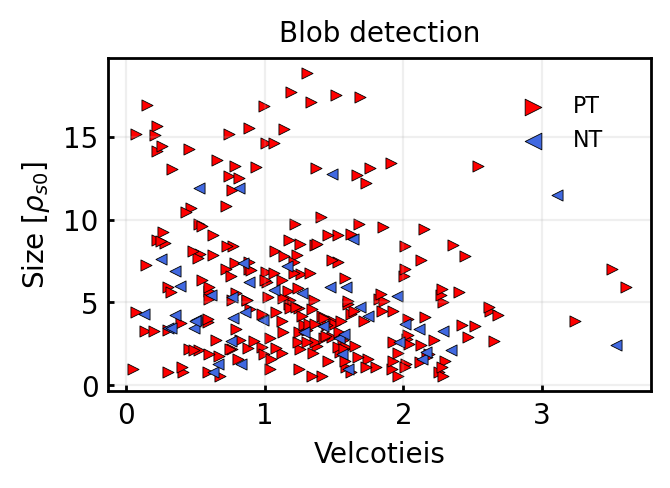

In [172]:
# Creating indices for x-axis
x_DNT = list(range(len(velocities_DNT)))
x_DPT = list(range(len(velocities_DPT)))

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
plt.scatter(velocities_DPT, areas_DPT, color='red', marker='>', label='PT', 
           ec='k', lw=0.3)
plt.scatter(velocities_DNT, areas_DNT, color='royalblue', marker='<', label='NT', 
           ec='k', lw=0.3)
#plt.scatter(velocities_DN, np.sqrt(np.array(matched_areas_DN)/np.pi),color='m', marker='x', label='ref')

#plt.scatter(np.array(velocities_DNT)*1.4, np.sqrt(np.array(matched_areas_DNT)/np.pi)*1.2,color='m', marker='x', label='PT theory')


#plt.scatter(x_DPT, sorted(velocities_DPT), color='red', marker='^', label='PT')
#plt.scatter(x_DNT, sorted(velocities_DNT), color='blue', marker='x', label='NT')
#plt.scatter(x_DNT, np.array(sorted(velocities_DNT))*1.4, color='m', marker='x', label='PT theory')

ax.grid(True, which='major', alpha=0.2, linestyle='-')
ax.grid(True, which='minor', alpha=0., linestyle='-')
ax.xaxis.set_tick_params(which='minor', direction="in", size=2)
ax.xaxis.set_tick_params(which='major', direction="in", size=2)
ax.yaxis.set_tick_params(which='minor', direction="in", size=2)
ax.yaxis.set_tick_params(which='major', direction="in", size=2)

#plt.title('Blob Velocities')
plt.xlabel('Velcotieis')
plt.ylabel(r'Size $[\rho_{s0}]$')
#ax.set_title(r'(tstep=%s, interval=%s)' %(tstep, time_interval))
ax.set_title('Blob detection')
#plt.legend()
plt.legend(
    bbox_to_anchor=(0.95, 0.95), 
    loc='upper right', 
    facecolor='grey', 
    framealpha=0.0, 
    prop={'size': 8},
    markerscale=1.5
          )

plt.show()



<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Application of the analytical blob scaling law</b></span><br>
    $a^* = \bigg(\frac{4L_\parallel^2}{\rho_s R_0} \bigg)^{1/5} \rho_s$ <br>
    $v^* = \bigg(\frac{2L_\parallel \rho_s^2}{R_0^3} \bigg)^{1/5} c_{s0}$
    
</div>

In [196]:
# Define constant parameters
rho_star = 1/700
rhos = R0 * rho_star
R0 = s.x0
safety_factor = 4
Lpar = np.pi * R0 * safety_factor
L1 = (2/3) * Lpar
L2 = (1/3) * Lpar
c_s0 = 1
rho_s0 = 1
nu = 0.3

Lambda_NT = ( nu * amp_DNT * L1**2 ) / (L2 * rhos)
Lambda_PT = ( nu * amp_DPT * L1**2 ) / (L2 * rhos)

astar = (4 * Lpar**2 / (rhos * R0))**(1/5) * rhos
vstar = (2 * Lpar * rhos**2 / (R0**3))**(1/5) * c_s0

v_NT_normalized = velocities_DNT / vstar
v_PT_normalized = velocities_DPT / vstar

areas_NT_normalized = areas_DNT / astar
areas_PT_normalized = areas_DPT / astar

Theta_NT = areas_NT_normalized**(5/2)
Theta_PT = areas_PT_normalized**(5/2)

print(astar, vstar)

7.3801620906830685 0.1386783787922652


In [197]:
print(Lambda_NT)

[ 576.68474808  533.87497476  482.18194678  572.68703306  806.32141873
  647.07120034 1438.57806501  530.62865122  789.4563022  1113.07510463
  457.71797568  614.60554665  647.27936915  486.00929345 1208.03832106
  852.19840729  579.5301321   457.43543669 1343.8091991   453.919695
  481.11852991  954.22805758  567.36544113  457.23589503  699.75487323
  977.68681413  530.06596801  455.72630847  983.87236169 1463.67184983
  732.30395659  508.87240439  680.36781098  477.49545499  826.32826753
  688.41773074  609.2282343   487.18833034  834.69430785 1252.04032408
  563.97968575  774.18723035 1235.33827931  620.82568236  460.86940344
  587.58102552  708.14394286  597.54018555]


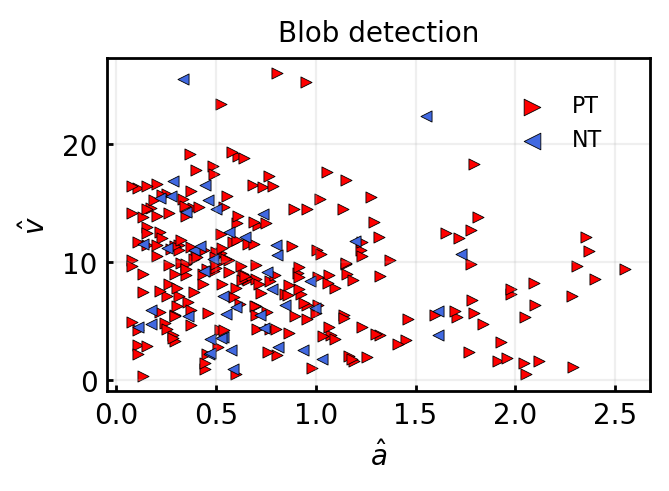

In [198]:
# Creating indices for x-axis
x_DNT = list(range(len(velocities_DNT)))
x_DPT = list(range(len(velocities_DPT)))

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
plt.scatter(areas_PT_normalized, v_PT_normalized, color='red', marker='>', label='PT', 
           ec='k', lw=0.3)
plt.scatter(areas_NT_normalized, v_NT_normalized, color='royalblue', marker='<', label='NT', 
           ec='k', lw=0.3)

ax.grid(True, which='major', alpha=0.2, linestyle='-')
ax.grid(True, which='minor', alpha=0., linestyle='-')
ax.xaxis.set_tick_params(which='minor', direction="in", size=2)
ax.xaxis.set_tick_params(which='major', direction="in", size=2)
ax.yaxis.set_tick_params(which='minor', direction="in", size=2)
ax.yaxis.set_tick_params(which='major', direction="in", size=2)

#plt.title('Blob Velocities')
plt.xlabel(r'$\hat{a}$')
plt.ylabel(r'$\hat{v}$')
#ax.set_title(r'(tstep=%s, interval=%s)' %(tstep, time_interval))
ax.set_title('Blob detection')
#plt.legend()
plt.legend(
    bbox_to_anchor=(0.95, 0.95), 
    loc='upper right', 
    facecolor='grey', 
    framealpha=0.0, 
    prop={'size': 8},
    markerscale=1.5
          )

plt.show()



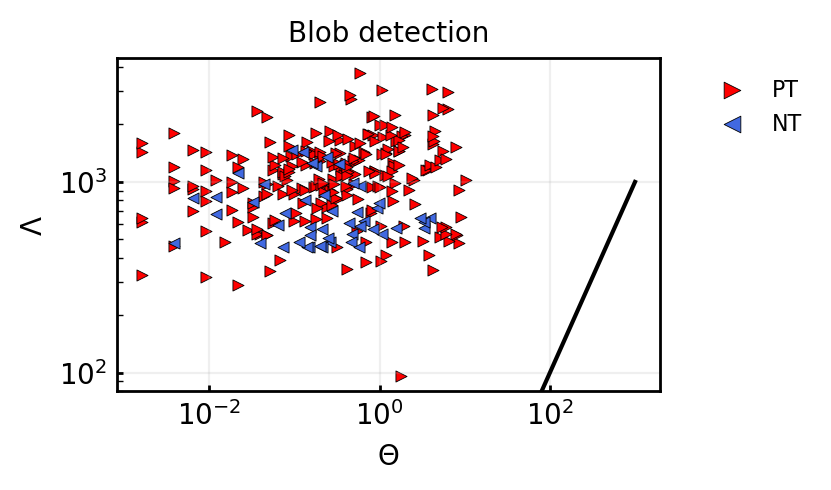

In [199]:
# Creating indices for x-axis
x_DNT = list(range(len(velocities_DNT)))
x_DPT = list(range(len(velocities_DPT)))

x_theta = np.linspace(0,1000,10)
y_theta = np.linspace(0,1000,10)

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=200)
plt.scatter(Theta_PT, Lambda_PT, color='red', marker='>', label='PT', 
           ec='k', lw=0.3)
plt.scatter(Theta_NT, Lambda_NT, color='royalblue', marker='<', label='NT', 
           ec='k', lw=0.3)
plt.plot(x_theta, y_theta, color='k')

ax.grid(True, which='major', alpha=0.2, linestyle='-')
ax.grid(True, which='minor', alpha=0., linestyle='-')
ax.xaxis.set_tick_params(which='minor', direction="in", size=2)
ax.xaxis.set_tick_params(which='major', direction="in", size=2)
ax.yaxis.set_tick_params(which='minor', direction="in", size=2)
ax.yaxis.set_tick_params(which='major', direction="in", size=2)

plt.yscale("log")
plt.xscale("log")

#plt.title('Blob Velocities')
plt.ylabel(r'$\Lambda$')
plt.xlabel(r'$\Theta$')

#ax.set_xlim([0.1, 1000])
#ax.set_ylim([0.1, 1000])

#ax.set_title(r'(tstep=%s, interval=%s)' %(tstep, time_interval))
ax.set_title('Blob detection')
#plt.legend()
plt.legend(
    bbox_to_anchor=(1.3, 1), 
    loc='upper right', 
    facecolor='grey', 
    framealpha=0.0, 
    prop={'size': 8},
    markerscale=1.5
          )

plt.show()


